In [7]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

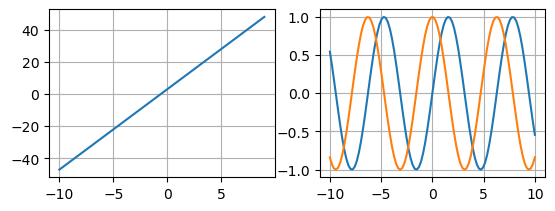

In [65]:
# 練習問題2-10
def my_function(x):
    return 5*x + 3
x = np.arange(-10, 10)
plt.subplot(2, 2, 1)
plt.plot(x, my_function(x))
plt.grid(True)
# 練習問題2-11
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
plt.subplot(2, 2, 2)
plt.plot(x, np.sin(x))
plt.plot(y, np.cos(y))
plt.grid(True)

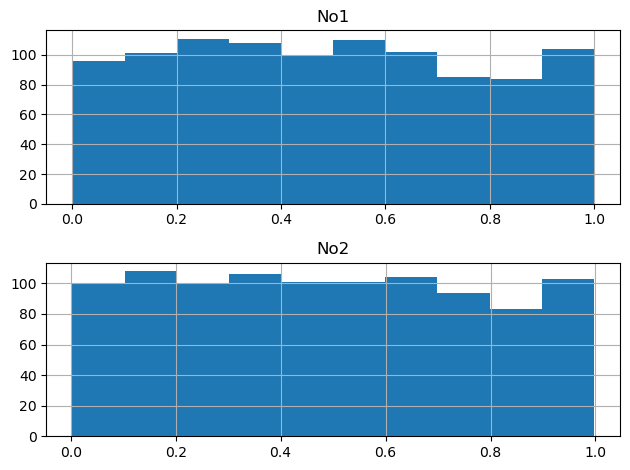

In [85]:
# 練習問題2-12
def uni_hist(N):
    x = np.random.uniform(0.0, 1.0, N)
    plt.subplot(2, 1, 1)
    plt.hist(x)
    plt.title("No1")
    plt.grid(True)
    
    y = np.random.uniform(0.0, 1.0, N)
    plt.subplot(2, 1, 2)
    plt.hist(y)
    plt.title("No2")
    plt.grid(True)
    
    plt.tight_layout()

uni_hist(1000)

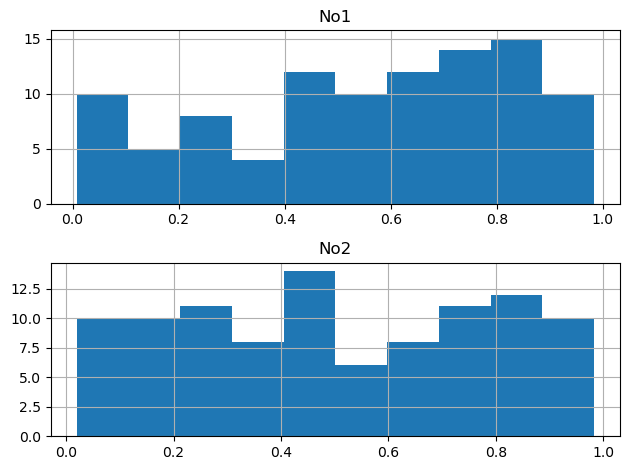

In [87]:
uni_hist(100)

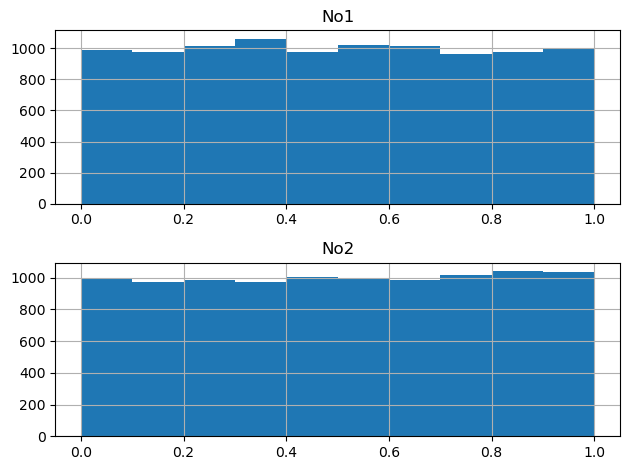

In [89]:
uni_hist(10000)

7895
円周率 3.158


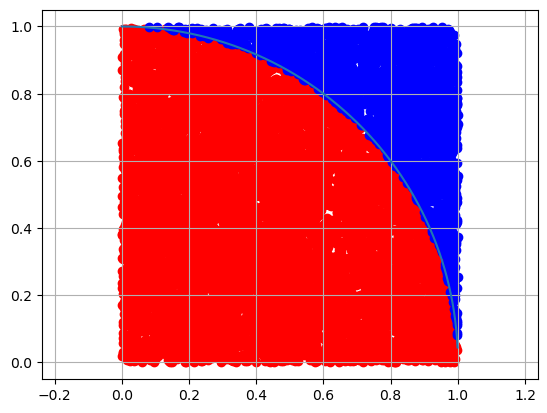

In [123]:
# 2章総合問題
# モンテカルロ法：半径1の円の面積が円周率に等しい。
# 長さ1の正方形の内部の点全体に対する、円の内部の点全体の個数の割合を、円の面積と考える。
# つまり、円の内部の点の個数/合計の点の個数　が、円の面積と考えられる。割合を面積と考えているのがポイント。
# 最初は1/4の円で考えているから、4倍することで丸い円を考えたことになる。
import math
# 1
N = 10000
x = np.random.uniform(0.0, 1.0, N)
y = np.random.uniform(0.0, 1.0, N)
# 2
# math.hypot(x[0], y[0])　例。
# 円の中のxとy
inside_x = []
inside_y = []

# 円の外のxとy
outside_x = []
outside_y = []

count_inside = 0
for count in range(0, N):
    d = math.hypot(x[count], y[count])
    if d < 1:
        count_inside += 1
        inside_x.append(x[count])
        inside_y.append(y[count])
    else:
        outside_x.append(x[count])
        outside_y.append(y[count])
    
print(count_inside)

# 円を書く
circle_x = np.arange(0, 1, 0.001)
circle_y = np.sqrt(1 - circle_x * circle_x)
plt.plot(circle_x, circle_y)
plt.axis("equal")  # x, y の比率を同じにする

# 円の中がred
plt.scatter(inside_x, inside_y, color="r")
# 円の外がblue
plt.scatter(outside_x, outside_y, color="b")

plt.grid(True)

# 3
print("円周率", count_inside / N * 4)

In [125]:
pwd

'C:\\Users\\utaka\\OneDrive\\デスクトップ\\programing\\pythonTodai'

In [127]:
mkdir chap3

In [131]:
cd ./chap3

C:\Users\utaka\OneDrive\デスクトップ\programing\pythonTodai\chap3


In [133]:
pwd

'C:\\Users\\utaka\\OneDrive\\デスクトップ\\programing\\pythonTodai\\chap3'

In [278]:
# import requests, zipfile
from io import StringIO
import io
from pathlib import Path 
import pandas as pd
import scipy as sp

In [167]:
p = Path(r"student.zip")
z = zipfile.ZipFile(p)
z.extractall()

In [188]:
student_data_math = pd.read_csv("student-mat.csv", sep=";")
# ?pd.read_csv
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [190]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [202]:
student_data_math["sex"].head()
student_data_math["absences"].head()
student_data_math.groupby("sex")["age"].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

5.708860759493671
4.0
0    0
Name: absences, dtype: int64


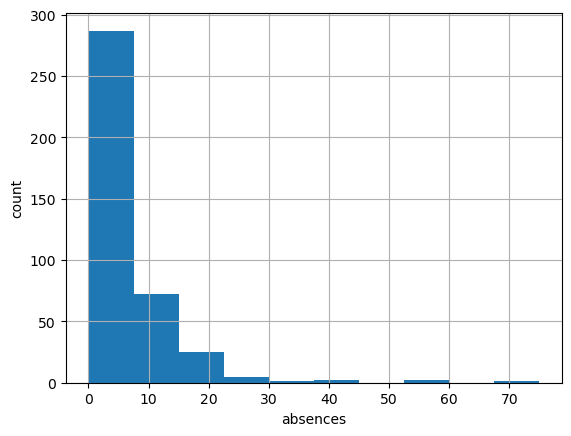

In [208]:
plt.hist(student_data_math["absences"])
plt.xlabel("absences")
plt.ylabel("count")
plt.grid(True)
print(student_data_math["absences"].mean())
print(student_data_math["absences"].median())
print(student_data_math["absences"].mode())

In [212]:
print(student_data_math["absences"].var(ddof=0))
print(student_data_math["absences"].std(ddof=0))

63.887389841371515
7.992958766400057


In [220]:
print(student_data_math["absences"].describe())
# 四分位範囲
student_data_math["absences"].describe()["75%"] - student_data_math["absences"].describe()["25%"]

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


8.0

In [258]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


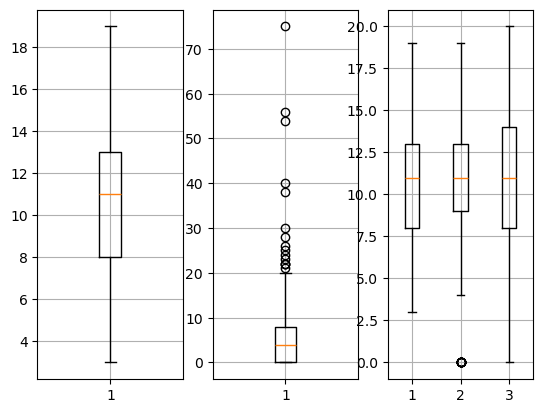

In [246]:
# 箱ひげ図
plt.subplot(1, 3, 1)
plt.boxplot(student_data_math["G1"])
plt.grid(True)

plt.subplot(1, 3, 2)
plt.boxplot(student_data_math["absences"])
plt.grid(True)

plt.subplot(1, 3, 3)
plt.boxplot([student_data_math["G1"], student_data_math["G2"], student_data_math["G3"]])
plt.grid(True)

In [270]:
# 変動係数
# student_data_math.describe() 
student_data_math.std(ddof=0, numeric_only=True) / student_data_math.mean(numeric_only=True)

age           0.076330
Medu          0.397673
Fedu          0.431019
traveltime    0.481058
studytime     0.411791
failures      2.222501
famrel        0.227042
freetime      0.308334
goout         0.357645
Dalc          0.600679
Walc          0.561409
health        0.390651
absences      1.400097
G1            0.303881
G2            0.350641
G3            0.439324
dtype: float64

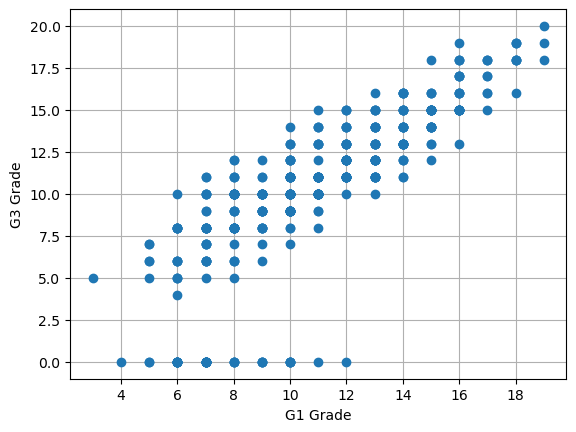

In [272]:
plt.plot(student_data_math["G1"], student_data_math["G3"], "o")
plt.xlabel("G1 Grade")
plt.ylabel("G3 Grade")
plt.grid(True)

In [282]:
# 共分散行列
print(np.cov(student_data_math["G1"], student_data_math["G3"], ddof=0))
# 相関係数
print(sp.stats.pearsonr(student_data_math["G1"], student_data_math["G3"]))

[[10.98916199 12.15682743]
 [12.15682743 20.93647813]]
PearsonRResult(statistic=0.801467932017414, pvalue=9.00143031227676e-90)


In [284]:
np.corrcoef([student_data_math["G1"], student_data_math["G3"]])

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

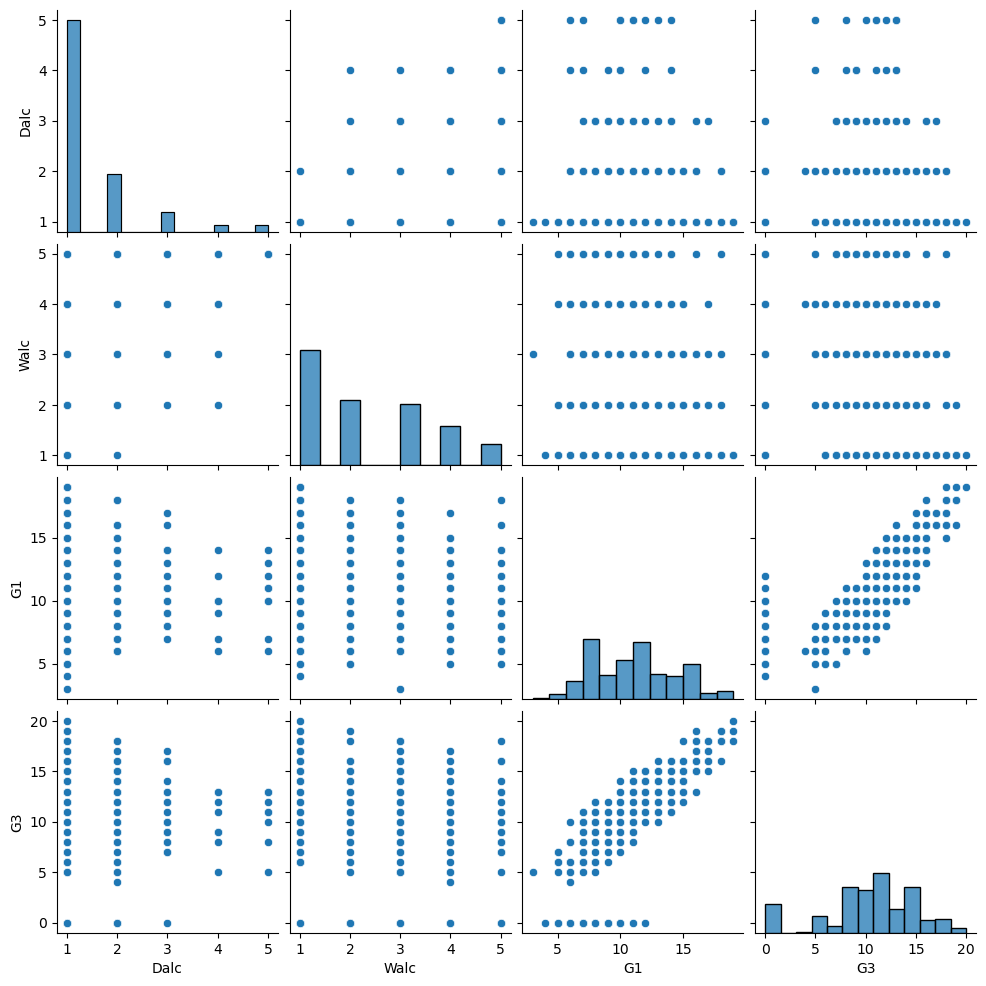

In [286]:
sns.pairplot(student_data_math[["Dalc", "Walc", "G1", "G3"]])
plt.grid(True)

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

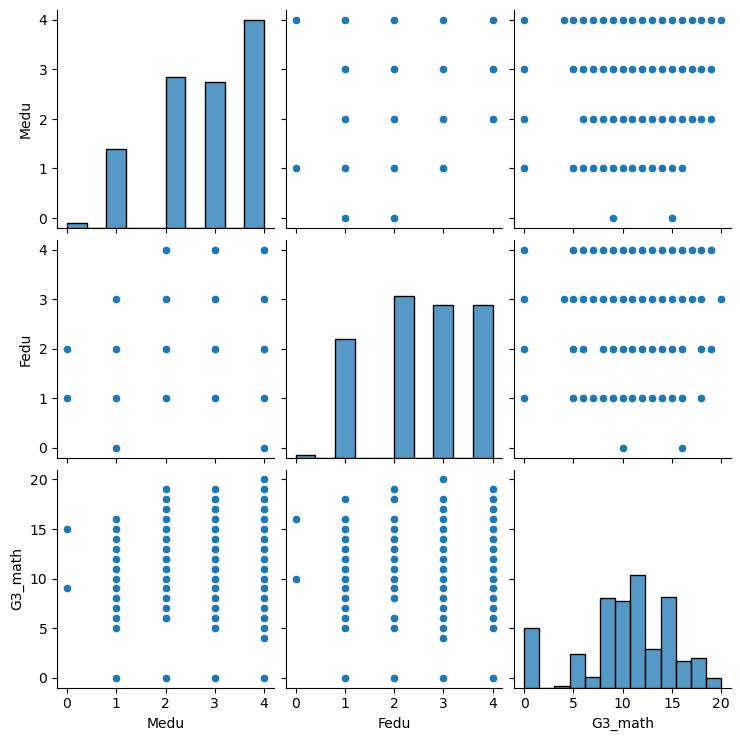

In [306]:
# 練習問題3-1
student_data_por = pd.read_csv("student-por.csv", sep=";")
print(student_data_por.describe())
# print(student_data_por.info())
# 練習問題3-2
# 一意に特定する主キーはない。ただ指定したキーの中で、同じ内容の部分をくっつけているだけ。
student_data_merge = pd.merge(student_data_math
                            , student_data_por
                            , on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu",
                              "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
                            , suffixes=("_math", "_por"))
student_data_merge.describe()
# 練習問題3-3
sns.pairplot(student_data_merge[["Medu", "Fedu", "G3_math"]])
plt.grid(True)

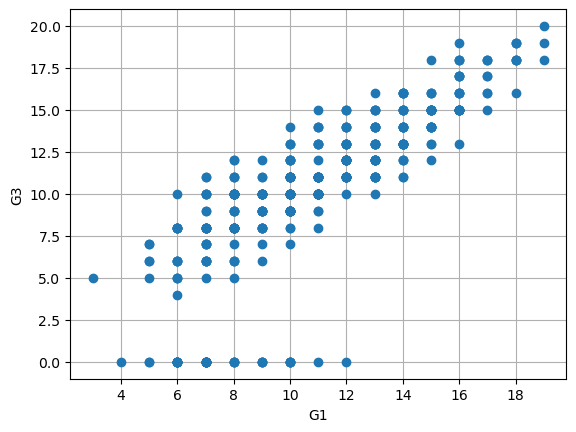

In [324]:
plt.plot(student_data_math["G1"], student_data_math["G3"], "o")
plt.xlabel("G1")
plt.ylabel("G3")
plt.grid(True)

[[1.10625609]] [-1.65280383]


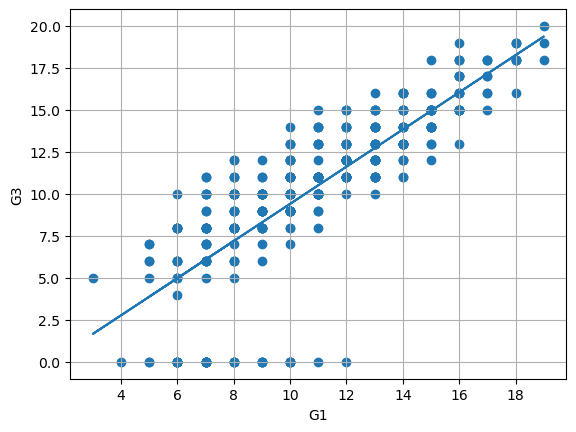

In [328]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

X = student_data_math.loc[:, ["G1"]].values
Y = student_data_math.loc[:, ["G3"]].values
reg.fit(X, Y)
print(reg.coef_, reg.intercept_)
plt.scatter(X, Y)
plt.xlabel("G1")
plt.ylabel("G3")

plt.plot(X, reg.predict(X))
plt.grid(True)

In [330]:
# 決定係数
reg.score(X, Y)

0.64235084605227